# Rabi Flopping

This example covers Rabi flopping of a single spin in a magnetic field.  We'll make a spin with quantum number $F=1/2$, place it in a magnetic field to split the states, then evolve it to watch the spin rotate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylcp
from pylcp.common import spherical2cart, cart2spherical

### Define the problem
In this example, we include only one manifold (the ground manifold) simply because we do not need to worry about lasers and damping. 
We also want to create the spin operator $\mathbf{F}=-\boldsymbol{\mu}/(\mu_B g_F)$, which tells us which direction the spin is pointing on average.  Combined with `obe.observable()`, we calculate $\langle \mathbf{F} \rangle$.  Note that in `pylcp`, $g_F > 0$ implies a magnetic moment $\boldsymbol{\mu}$ that is antialigned with $\mathbf{F}$.  This convention is standard when the magnetic moment is dominated by the electron.  In this configuration, the spin will rotate counter-clockwise when viewed from the tip of the magnetic field vector.

In [2]:
gF = 1 
H_0, mu_q = pylcp.hamiltonians.singleF(1/2, gF=gF, muB=1)

# Construct operators for calculation of expectation values of spin (F) and mu:
mu = spherical2cart(mu_q)
F = -mu/gF # Note that muB=1 

hamiltonian = pylcp.hamiltonian()
hamiltonian.add_H_0_block('g', H_0)
hamiltonian.add_mu_q_block('g', mu_q)

magField = pylcp.constantMagneticField(np.array([1., 0., 0.]))
laserBeams = {}

### Evolve with $B=(1, 0, 0)$

This should make it rotate in the $\hat{y}$-$\hat{z}$ plane.  After $t = \pi \hbar \mu_B B$, it should end up along $-\hat{y}$, if $g_F>0$.

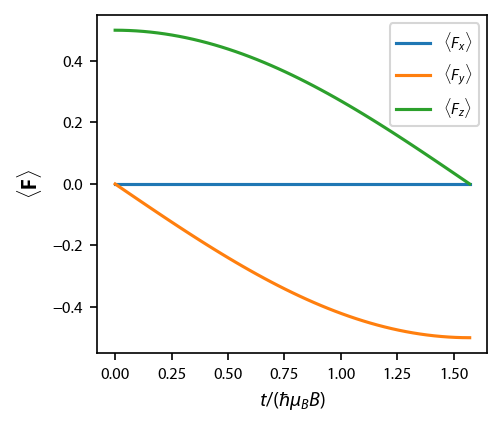

In [3]:
obe = pylcp.obe(laserBeams, magField, hamiltonian, transform_into_re_im=False)
pop = np.zeros((H_0.shape[0],))
pop[-1] = 1

obe.set_initial_rho_from_populations(pop)
obe.evolve_density([0, np.pi/2], t_eval=np.linspace(0, np.pi/2, 51))
avF = obe.observable(F)

fig, ax = plt.subplots(1, 1)

lbls = ['$\\langle F_x\\rangle$', '$\\langle F_y\\rangle$', '$\\langle F_z\\rangle$']
[ax.plot(obe.sol.t, avF[ii], label=lbls[ii]) for ii in range(3)]
ax.set_xlabel('$t/(\hbar \mu_B B)$')
ax.set_ylabel('$\langle \\mathbf{F}\\rangle$')
ax.legend(fontsize=8);

### Evolve again with $B=(0, 0, 1)$

This should make it rotate in the $\hat{x}$-$\hat{y}$ plane, couter clockwise when viewed from $+\hat{z}$.

Note that rather than redefining the OBEs, I just replaced its internal `magField` variable.  This is possible, because the OBEs construction in `pylcp` are only dependent on the Hamiltonian, not the external fields.

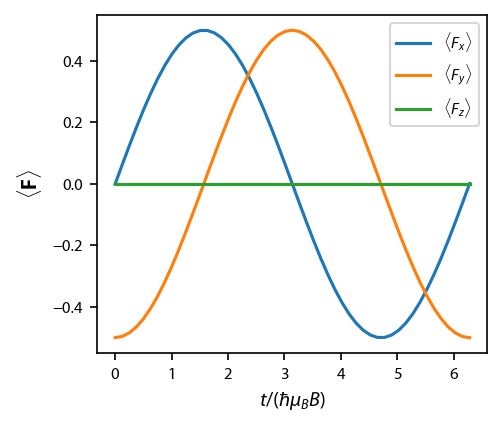

In [4]:
obe.set_initial_rho(obe.sol.rho[:, :, -1])
obe.magField = pylcp.magField(lambda R: np.array([0., 0., 1.]))
obe.evolve_density([0, 2*np.pi], t_eval=np.linspace(0, 2*np.pi, 51))
avF = obe.observable(F)

fig, ax = plt.subplots(1, 1)
[ax.plot(obe.sol.t, avF[ii], label=lbls[ii]) for ii in range(3)]
ax.set_xlabel('$t/(\hbar \mu_B B)$')
ax.set_ylabel('$\langle \\mathbf{F}\\rangle$')
ax.legend(fontsize=8);